In [1]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
inpath = "/sps/lsst/groups/clusters/cluster_comparison_project/before_matching/"
outpath = "/sps/lsst/users/namourou/web/desc/cluster_comparison_project/amico.cosmoDC2.fzb.magy_vs_amico.DC2.fzb.magy/"
#outpath1 = outpath + "amico.cosmoDC2.fzb/magy/"
#outpath2 = outpath + "amico.DC2.fzb/magy/"
#outpathvs = outpath + "amico.cosmoDC2.fzb.magy_vs_amico.DC2.fzb.magy/"

In [3]:
c1 = Table.read(inpath + "amico/cosmoDC2.fzb/magy/Catalog.fits")
c2 = Table.read(inpath + "amico/DC2.fzb.magy/v0/Catalog.fits")

## Number of clusters 

In [6]:
print(f"Il y a N = {len(c1)} amas dans AMICO sur CosmoDC2.\nIl y a N = {len(c2)} amas dans AMICO sur DC2.\nIl y a {round(len(c1)/len(c2),1)}x moins d'amas dans AMICO DC2.")
print(f"La surface de DC2 est {round(439.78986/302.65,1)}x moins grande que celle de CosmoDC2 and there are 1.4x more halos in cosmoDC2.")
print(f"\nd = {round(len(c1)/439.78986,1)} amas/deg² pour AMICO sur CosmoDC2.\nd = {round(len(c2)/302.65,1)} amas/deg² pour AMICO sur DC2.")

Il y a N = 165149 amas dans AMICO sur CosmoDC2.
Il y a N = 74502 amas dans AMICO sur DC2.
Il y a 2.2x moins d'amas dans AMICO DC2.
La surface de DC2 est 1.5x moins grande que celle de CosmoDC2 and there are 1.4x more halos in cosmoDC2.

d = 375.5 amas/deg² pour AMICO sur CosmoDC2.
d = 246.2 amas/deg² pour AMICO sur DC2.


In [8]:
print(f"There are N = {len(c1)} clusters in AMICO on cosmoDC2.\nThere are N = {len(c2)} clusters in AMICO on DC2.\nThere are {round(len(c1)/len(c2),1)}x less clusters in AMICO DC2.")
print(f"\nDC2 surface is {round(439.78986/302.65,1)}x as big as CosmoDC2 and there are 1.4x more halos in cosmoDC2.")
print(f"\nd = {round(len(c1)/439.78986,1)} cl/deg² for AMICO on CosmoDC2.\nd = {round(len(c2)/302.65,1)} cl/deg² for AMICO on DC2.")

There are N = 165149 clusters in AMICO on cosmoDC2.
There are N = 74502 clusters in AMICO on DC2.
There are 2.2x less clusters in AMICO DC2.

DC2 surface is 1.5x as big as CosmoDC2 and there are 1.4x more halos in cosmoDC2.

d = 375.5 cl/deg² for AMICO on CosmoDC2.
d = 246.2 cl/deg² for AMICO on DC2.


## Redshift distributions

In [6]:
z_bins = np.linspace(0,2,40)

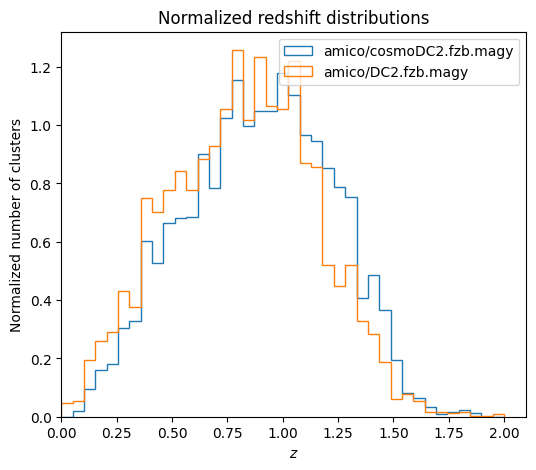

In [20]:
plt.figure(figsize = [6,5])
plt.hist(c1["z_cl"], bins = z_bins, label = "amico/cosmoDC2.fzb.magy", histtype = "step", density = True)
plt.hist(c2["z_cl"], bins = z_bins, label = "amico/DC2.fzb.magy", histtype = "step", density = True)
plt.xlabel("$z$")
plt.title("Normalized redshift distributions")
plt.ylabel("Normalized number of clusters")
plt.xlim([0,2.1])
plt.legend()
plt.savefig(outpath + "redshift_distributions_normalized.png", bbox_inches='tight')
plt.show()

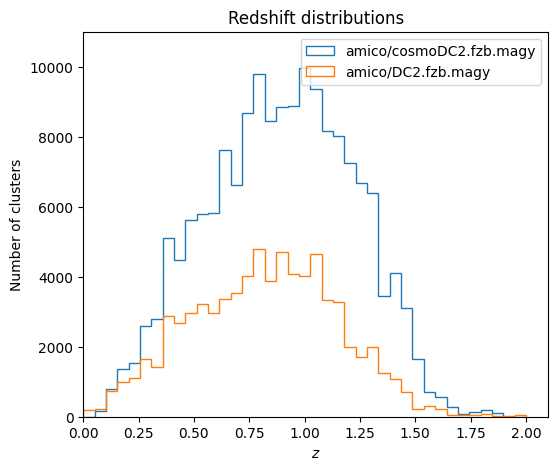

In [40]:
plt.figure(figsize = [6,5])
plt.hist(c1["z_cl"], bins = z_bins, label = "amico/cosmoDC2.fzb.magy", histtype = "step")
plt.hist(c2["z_cl"], bins = z_bins, label = "amico/DC2.fzb.magy", histtype = "step")
plt.xlabel("$z$")
plt.title("Redshift distributions")
plt.ylabel("Number of clusters")
plt.xlim([0,2.1])
plt.ylim([0,11000])
plt.legend()
plt.savefig(outpath + "redshift_distributions.png", bbox_inches='tight')
plt.show()

### Redshift distribution with cut on SNR

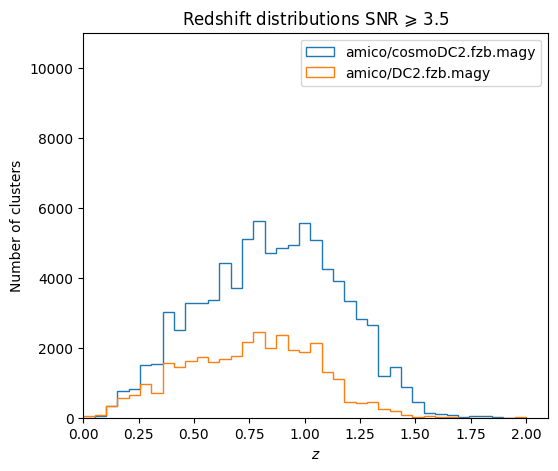

In [41]:
plt.figure(figsize = [6,5])
plt.hist(c1[c1["snr_cl"]>=3.5]["z_cl"], bins = z_bins, label = "amico/cosmoDC2.fzb.magy", histtype = "step")
plt.hist(c2[c2["snr_cl"]>=3.5]["z_cl"], bins = z_bins, label = "amico/DC2.fzb.magy", histtype = "step")
plt.xlabel("$z$")
plt.title("Redshift distributions SNR $\geqslant$ 3.5")
plt.ylabel("Number of clusters")
plt.xlim([0,2.1])
plt.ylim([0,11000])
plt.legend()
plt.savefig(outpath + "redshift_distributions_cut_snr3.5.png", bbox_inches='tight')
plt.show()

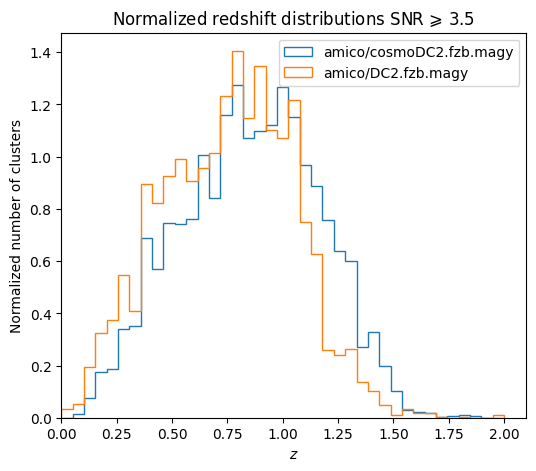

In [46]:
plt.figure(figsize = [6,5])
plt.hist(c1[c1["snr_cl"]>=3.5]["z_cl"], bins = z_bins, label = "amico/cosmoDC2.fzb.magy", histtype = "step", density = True)
plt.hist(c2[c2["snr_cl"]>=3.5]["z_cl"], bins = z_bins, label = "amico/DC2.fzb.magy", histtype = "step", density = True)
plt.xlabel("$z$")
plt.title("Normalized redshift distributions SNR $\geqslant$ 3.5")
plt.ylabel("Normalized number of clusters")
plt.xlim([0,2.1])
plt.legend()
plt.savefig(outpath + "redshift_distributions_normalized_cut_snr3.5.png", bbox_inches='tight')
plt.show()

### SNR distributions

In [21]:
snr_bins = np.linspace(0,10,41)

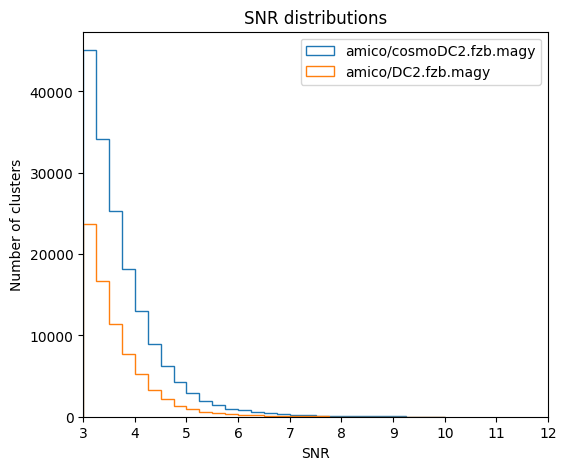

In [47]:
plt.figure(figsize = [6,5])
plt.hist(c1["snr_cl"], bins = snr_bins, label = "amico/cosmoDC2.fzb.magy", histtype = "step")
plt.hist(c2["snr_cl"], bins = snr_bins, label = "amico/DC2.fzb.magy", histtype = "step")
plt.xlabel("SNR")
plt.title("SNR distributions")
plt.ylabel("Number of clusters")
plt.xlim([3,12])
plt.legend()
plt.savefig(outpath + "snr_distributions.png", bbox_inches='tight')
plt.show()

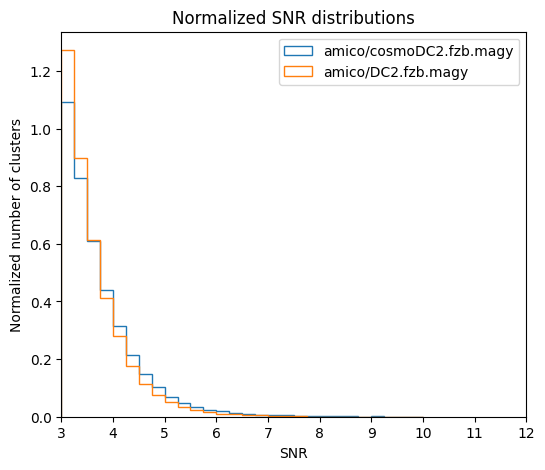

In [48]:
plt.figure(figsize = [6,5])
plt.hist(c1["snr_cl"], bins = snr_bins, label = "amico/cosmoDC2.fzb.magy", histtype = "step", density = True)
plt.hist(c2["snr_cl"], bins = snr_bins, label = "amico/DC2.fzb.magy", histtype = "step", density = True)
plt.xlabel("SNR")
plt.title("Normalized SNR distributions")
plt.ylabel("Normalized number of clusters")
plt.xlim([3,12])
plt.legend()
plt.savefig(outpath + "snr_distributions_normalized.png", bbox_inches='tight')
plt.show()

In [9]:
print(f"SNR moyen pour AMICO sur CosmoDC2 : {round(np.mean(c1['snr_cl']),2)}\nSNR moyen pour AMICO sur DC2 : {round(np.mean(c2['snr_cl']),2)}")

SNR moyen pour AMICO sur CosmoDC2 : 3.74
SNR moyen pour AMICO sur DC2 : 3.63


### $\lambda^*$ versus z

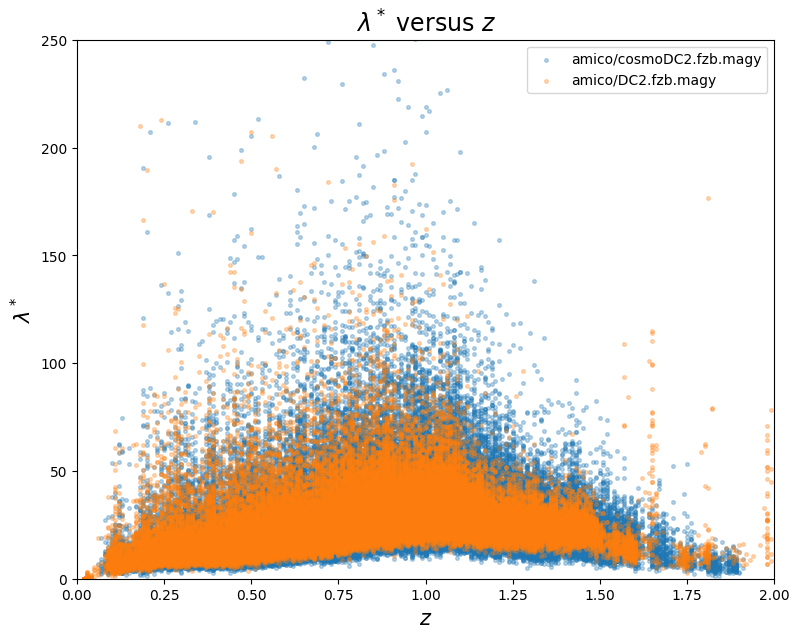

In [23]:
plt.figure(figsize = [9,7])
plt.scatter(c1["z_cl"], c1["mass"], alpha = .3, s =7, label = "amico/cosmoDC2.fzb.magy")
plt.scatter(c2["z_cl"], c2["mass"], alpha = .3, s=7, label = "amico/DC2.fzb.magy")
plt.xlabel("$z$", fontsize = 15)
plt.title("$\lambda^*$ versus $z$", fontsize = 17)
plt.ylabel("$\lambda^*$", fontsize = 15)
plt.ylim([0,250])
plt.xlim([0,2])
plt.legend()
plt.savefig(outpath + "lambdastar_vs_z_strange_features.png", bbox_inches='tight')
plt.show()

### Clusters density

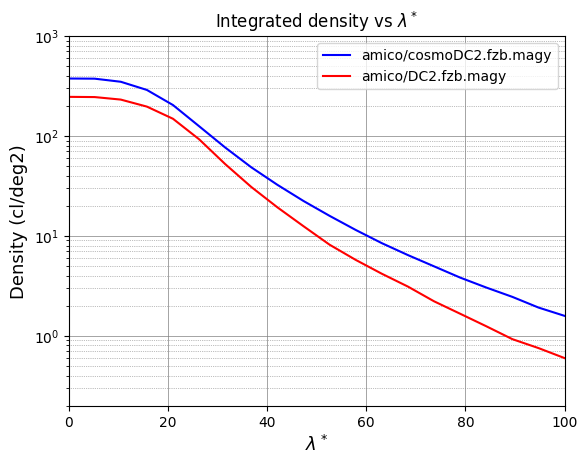

In [28]:
sky_area_sq_deg1 = 439.78986
sky_area_sq_deg2 = 302.65
rich_bins = np.linspace(0, 100, 20)
#rich_binsb = np.linspace(0, 75, 15)
cdf1 = np.searchsorted(c1["mass"], rich_bins, sorter=c1["mass"].argsort())
cdf1 = len(c1)-cdf1
#cdf1b = np.searchsorted(c1["mass"], rich_bins*par[0]+par[1], sorter=c1["mass"].argsort())
#cdf1b = len(c1)-cdf1b
cdf2 = np.searchsorted(c2["mass"], rich_bins, sorter=c2["mass"].argsort())
cdf2 = len(c2)-cdf2
g1, = plt.semilogy(rich_bins, cdf1 / sky_area_sq_deg1, color = 'blue', label = 'amico/cosmoDC2.fzb.magy')
#g1b, = plt.semilogy(rich_bins*par[0]+par[1], cdf1b / sky_area_sq_deg, color = 'blue', label = 'amico_rescaled', linestyle = '--')
g2, = plt.semilogy(rich_bins, cdf2 / sky_area_sq_deg2, color = 'red', label = 'amico/DC2.fzb.magy')
plt.xlabel("$\lambda^*$", fontsize = 13);
plt.ylabel("Density (cl/deg2)", fontsize = 13);
plt.legend()
#plt.xscale('log')
plt.ylim([0.2,1000])
plt.xlim([0,100])
plt.title("Integrated density vs $\lambda^*$")
plt.grid(which='major', axis='both', linestyle='-', linewidth='0.5', color='grey')
plt.grid(which='minor', axis='both', linestyle=':', linewidth='0.5', color='grey')

In [25]:
np.searchsorted(c1["mass"], rich_bins, sorter=c1["mass"].argsort())

array([     0,    572,  11888,  38222,  75542, 110122, 131467, 143807,
       150895, 155327, 158177, 160111, 161432, 162326, 162970, 163468,
       163812, 164071, 164306, 164453])

### Footprint

#### Clusters

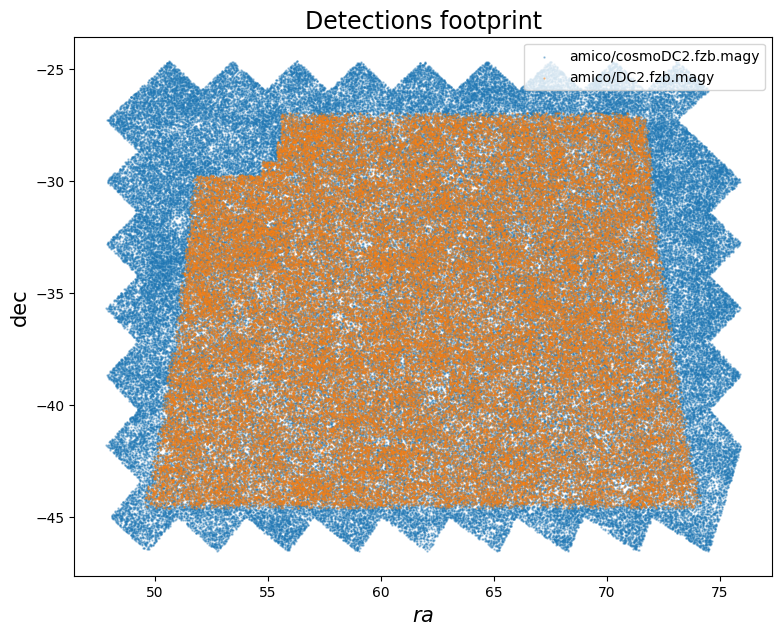

In [25]:
plt.figure(figsize = [9,7])
plt.scatter(c1["ra_cl"], c1["dec_cl"], alpha = .4, s=.5, label = "amico/cosmoDC2.fzb.magy")
plt.scatter(c2["ra_cl"], c2["dec_cl"], alpha = .4, s=.5, label = "amico/DC2.fzb.magy")
plt.xlabel("$ra$", fontsize = 15)
plt.title("Detections footprint", fontsize = 17)
plt.ylabel("dec", fontsize = 15)
#plt.ylim([0,250])
#plt.xlim([0,2])
plt.legend(loc = 'upper right')
plt.savefig(outpath + "footprint.png", bbox_inches='tight')
plt.show()